In [1]:
from netCDF4 import Dataset as NetCDFFile
import numpy as np
from numpy import matlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
import xarray as xr
from numpy import meshgrid
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.font_manager import findfont, FontProperties
from mpl_toolkits.basemap import Basemap
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
font = findfont(FontProperties(family=['sans-serif']))
font

'/System/Library/Fonts/LucidaGrande.ttc'

In [2]:
owda = xr.open_dataset('owda_hd_fix_500.nc').pdsi.transpose('time','lon','lat')
xx,yy=meshgrid(owda.lat,owda.lon)
owda2 = np.array(owda.sel(time=slice(1300,2012)))
for x in range(0,114):
    for y in range(0,88):
        if owda2[0,x,y] == np.nan:
            owda2[:,x,y] = np.nan
        else:
            continue

In [3]:
from eofs.standard import Eof
coslat = np.expand_dims(np.expand_dims(np.cos(np.radians(owda.lat)),axis=0),axis=1)
wght1 = np.sqrt(np.tile(coslat,[711,114,1]))

solver={};pc={};eof={};eigen={};variance={};
solver = Eof(owda2,weights = wght1)
pc = solver.pcs(npcs=50,pcscaling=0)
eof = solver.eofs(eofscaling=2,neofs=5)
eigen = solver.eigenvalues()
variance = solver.varianceFraction()
print(variance[0:5])

[0.14872253 0.11489574 0.07411246 0.06099383 0.05270824]


In [34]:
pc1 = pc[:,0]/np.sqrt(eigen[1]); pc1_std = np.array(pd.DataFrame(data=pc1).rolling(50,min_periods=50).std())#change 50,75,100
pc2 = pc[:,1]/np.sqrt(eigen[1]); pc2_std = np.array(pd.DataFrame(data=pc2).rolling(50,min_periods=50).std())#change 50,75,100


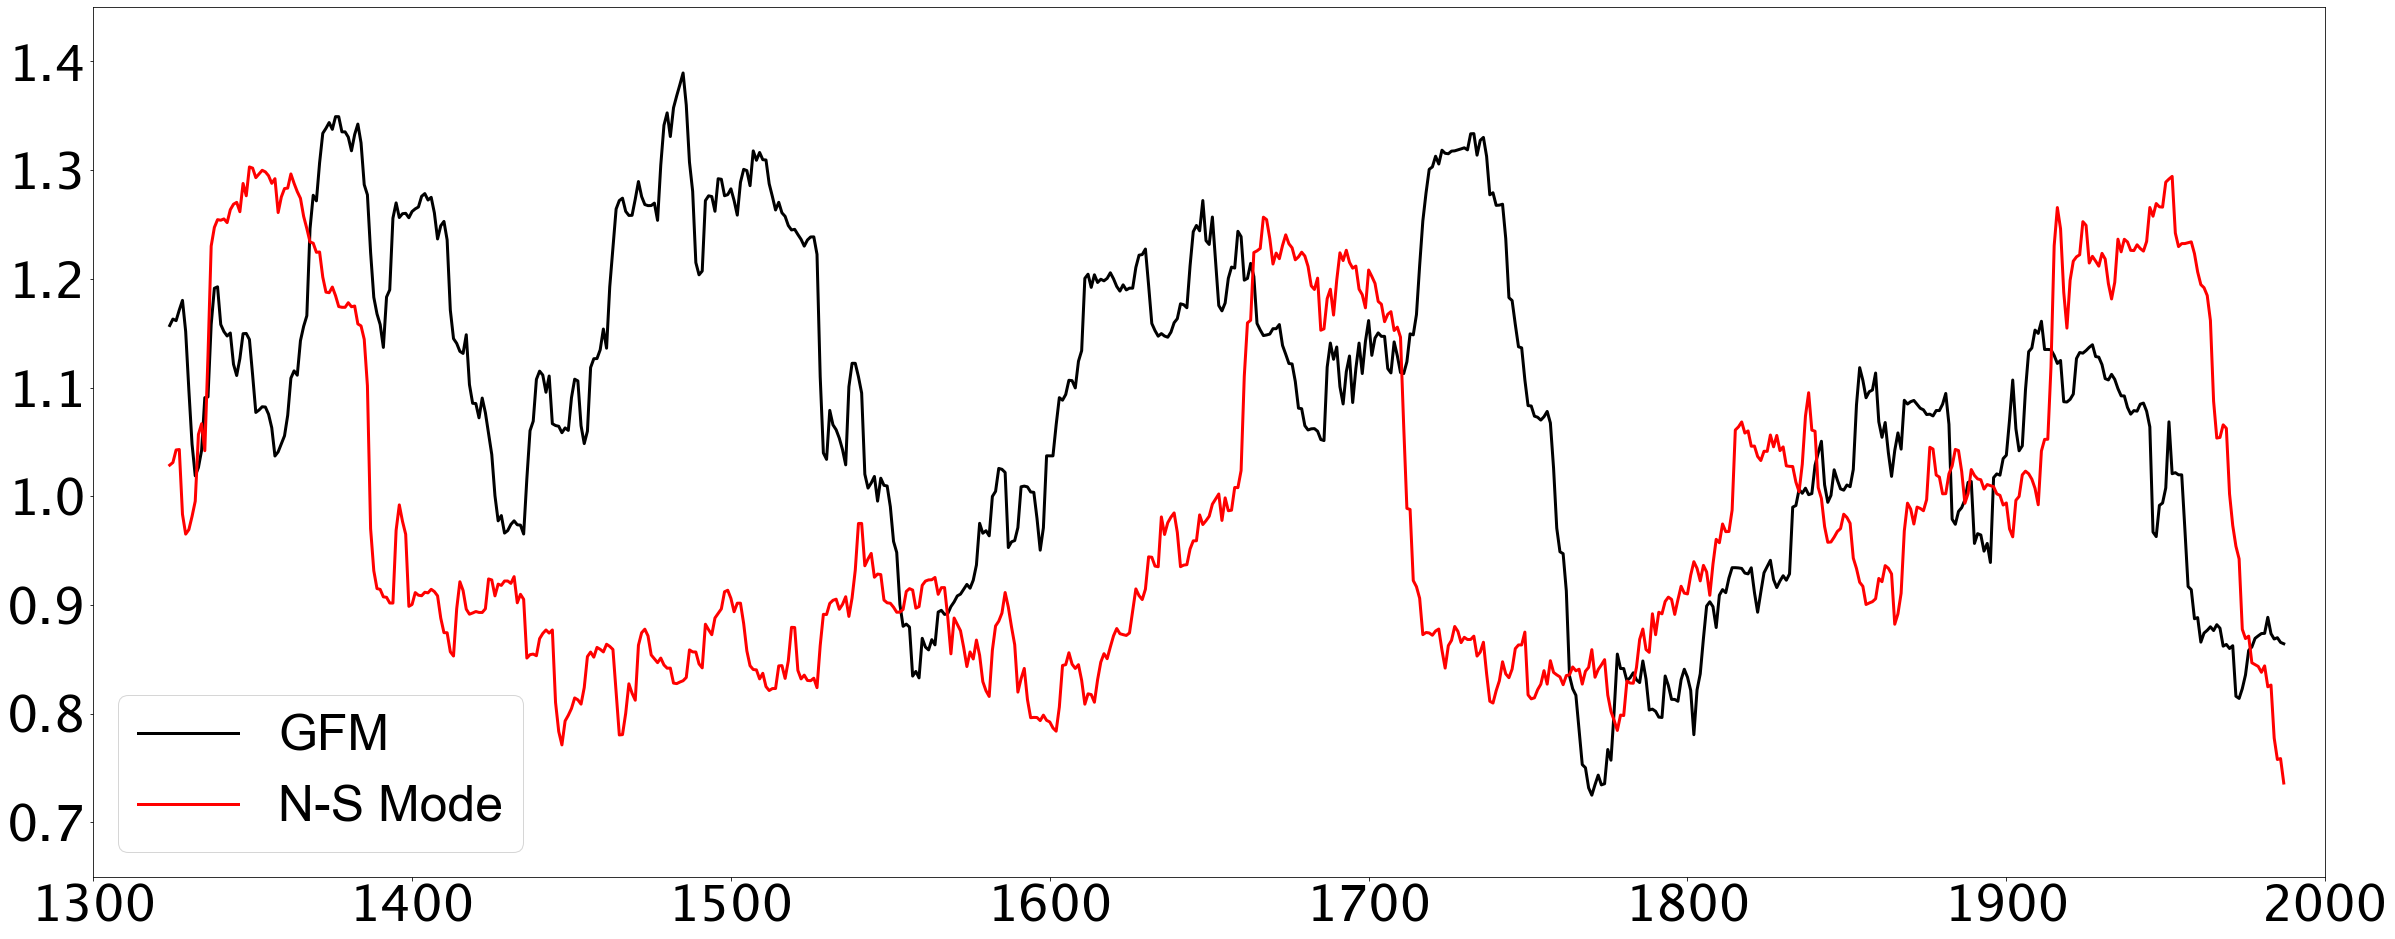

In [35]:
font = findfont(FontProperties(family=['sans-serif']))

plt.figure(figsize=(40,16))

line1 = plt.plot(pc1_std[25::],color='black',label="GFM");plt.setp(line1,linewidth = 3);
line2 = plt.plot(pc2_std[25::],color='red',label="N-S Mode");plt.setp(line2,linewidth = 3);
plt.legend(loc=3,prop={'size':50, 'family':'Arial'})

plt.ylim((0.65,1.45))
plt.xlim((0,700))

xval=[1300,1400,1500,1600,1700,1800,1900,2000]
x = [0,100,200,300,400,500,600,700]
plt.xticks(x,xval);


plt.tick_params(axis='both', which='major', labelsize=50)